##  CMSC 691: Homework 2

In this homework you will be working on clustering and try analyzing the data using various clustering algos from the scikit learn module.

You may use the Clusetring Jupyter Notebook Dr. Kalpakis prepared for the class.

### DataSet: 'Diabetic Data' 

This dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
1.	It is an inpatient encounter (a hospital admission).
2.	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3.	The length of stay was at least 1 day and at most 14 days.
4.	Laboratory tests were performed during the encounter.
5.	Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [6]:
import pandas as pd
import pylab as pl
import numpy as np

df = pd.read_csv('diabetic_data.csv')

### Q1. K-Means (10 pts):

Use the k-means clustering algo from sklearn.
Cluster the data over any numeric attribute by varying any 2 combinations of parameters of the KMeans algorithm 
and discuss the results obtained

Documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

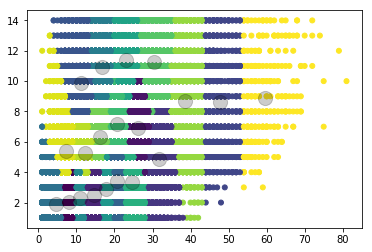

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

cluster = pd.DataFrame(columns=['num_medications', 'time_in_hospital'])
cluster['num_medications'] = df['num_medications'].copy()
cluster['time_in_hospital'] = df['time_in_hospital'].copy()

kmeans = KMeans(n_clusters=20).fit(cluster)

y_kmeans = kmeans.predict(cluster)
plt.scatter(cluster.num_medications, cluster.time_in_hospital, c=y_kmeans, s=25, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.2)

## Q2. Use the k-medoids clustering algorithm (30 pts):

k-medoids is a special case of k-means where the centroids are chosen from among the data points in the dataset.

Using k-medoids, create 2 different clusters of the above dataset.
1. Clustering over some numeric attributes of your choice.
2. Clustering over some nominal and numerical attributes of your choice.



In [14]:
##NONE OF THE BELOW CODE IS MINE -- 
##Ownership belongs to:
##https://github.com/salspaugh/ 
import random

clusterd = pd.DataFrame(columns=['num_medications', 'time_in_hospital'])
clusterd['num_medications'] = df['num_medications'].copy()
clusterd['time_in_hospital'] = df['time_in_hospital'].copy()

## None of the code above is mine
## Borrowed K-medoid implementation from source above.

#clusters, centers = cluster(clusterd.as_matrix(), k=3)


## Q3 Agglomerative (10 pts)

Use agglomerative clustering to demonstrate hierarchical (agglomerative) clustering of the dataset. Plot a dendrogram for your clustering.

In [8]:
from sklearn.cluster import AgglomerativeClustering

#from scipy.cluster.hierarchy import dendrogram, linkage

#data = [[0., 0.], [0.1, -0.1], [1., 1.], [1.1, 1.1]]

#Z = linkage(data)

#dendrogram(Z)
#
#
#
#

def met(met):
    if(met == "No"):
        return 0
    elif(met == "Steady"):
        return 1
    elif(met == "Down"):
        return 2
    return 3

def change(x):
    if(x == "No"):
        return 0
    elif(x == "Ch"):
        return 1
    return 2

def diabetesMed(x):
    if(x == "No"):
        return 0
    elif(x == "Yes"):
        return 1
    return 2

def gender(x):
    if(x == "Female"):
        return 0
    elif(x == "Male"):
        return 1
    return 2

def readmitted(x):
    if(x == "NO"):
        return 0
    elif(x == ">30"):
        return 1
    elif(x == "<30"):
        return 2
    return 3

def race(x):
    if(x == "Caucasian"):
        return 0
    elif(x == "AfricanAmerican"):
        return 1
    return 2

def clean(x):
    if(x == "?"):
        return 9

def clean_int(x):
    return 1;

model = AgglomerativeClustering()


agCluster = df.copy()[50:250]

agCluster.race = agCluster.race.apply(race)
agCluster.gender = agCluster.gender.apply(gender)
agCluster.age = 99

agCluster.max_glu_serum = 1 #agCluster.max_glu_serum.apply(met)
agCluster.A1Cresult = 99  # agCluster.A1Cresult.apply(met)
agCluster.weight = 1
agCluster.age = 1
agCluster.payer_code = 1
agCluster.medical_specialty = 1
agCluster.diag_1 = 1
agCluster.diag_2 = 1
agCluster.diag_3 = 1



agCluster.metformin = agCluster.metformin.apply(met)
agCluster.repaglinide = agCluster.repaglinide.apply(met)
agCluster.nateglinide = agCluster.nateglinide.apply(met)
agCluster.chlorpropamide = agCluster.chlorpropamide.apply(met)
agCluster.glimepiride = agCluster.glimepiride.apply(met)
agCluster.acetohexamide = agCluster.acetohexamide.apply(met)
agCluster.glipizide = agCluster.glipizide.apply(met)
agCluster.glyburide = agCluster.glyburide.apply(met)
agCluster.tolbutamide = agCluster.tolbutamide.apply(met)
agCluster.pioglitazone = agCluster.pioglitazone.apply(met)
agCluster.rosiglitazone = agCluster.rosiglitazone.apply(met)
agCluster.acarbose = agCluster.acarbose.apply(met)
agCluster.miglitol = agCluster.miglitol.apply(met)
agCluster.troglitazone = agCluster.troglitazone.apply(met)
agCluster.tolazamide = agCluster.tolazamide.apply(met)
agCluster.examide = agCluster.examide.apply(met)
agCluster.citoglipton = agCluster.citoglipton.apply(met)
agCluster.insulin = agCluster.insulin.apply(met)
agCluster["glipizide-metformin"] = agCluster["glipizide-metformin"].apply(met)
agCluster["glyburide-metformin"] = agCluster["glyburide-metformin"].apply(met)
agCluster["glimepiride-pioglitazone"] = agCluster["glimepiride-pioglitazone"].apply(met)
agCluster["metformin-rosiglitazone"] = agCluster["metformin-rosiglitazone"].apply(met)
agCluster["metformin-pioglitazone"] = agCluster["metformin-pioglitazone"].apply(met)
agCluster.change = agCluster.change.apply(change)
agCluster.diabetesMed = agCluster.diabetesMed.apply(diabetesMed)
agCluster.readmitted = agCluster.readmitted.apply(readmitted)

model.fit(agCluster)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x000001CE2CDC4048>)

## Q4 Spectral Clustering (10 pts)

Perform spectral clustering on attributes of your choice.

In [19]:
from sklearn.cluster import SpectralClustering

clusterp = pd.DataFrame(columns=['num_medications', 'time_in_hospital'])
clusterp['num_medications'] = df['num_medications'].copy()[0:50]
clusterp['time_in_hospital'] = df['time_in_hospital'].copy()[0:50]
#np.exp(- X ** 2 / (2. * delta ** 2))

sclust = SpectralClustering(n_clusters=2)
sclust.fit(clusterp)
#y_kmeans = kmeans.predict(cluster)
#plt.scatter(cluster.num_medications, cluster.time_in_hospital, c=y_kmeans, s=25, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.2)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

## Q5 Plotting clusters and discussion of results (40 pts)

Using tools from the matplot, seaborn, and pandas packages, illustrate the generated clusters for each of the clustering methods used above and discuss the results.